In [1]:
def binary_search_iter(lst, value):
    '''Input list must be sorted!'''
    if len(lst) == 0:
        print('Empty list')
        return
    
    left = 0
    right = len(lst) - 1
    mid = (right + left) // 2
    
    while right >= left:
        if lst[mid] == value:
            return mid
        elif lst[mid] > value:
            right = mid - 1
            mid = (right + left) // 2
        else: # lst[mid] < value
            left = mid + 1
            mid = (right + left) // 2
    return None


def binary_search_rec(lst, value):
    '''Input list must be sorted!'''
    if len(lst) == 0:
        return
    
    mid = len(lst) // 2
    
    if lst[mid] == value:
        return mid
    elif lst[mid] > value:
        return binary_search_rec(lst[:mid], value)
    else: # lst[mid] < value:
        return binary_search_rec(lst[mid+1:], value)

In [2]:
test_list = [0, 2, 4, 6, 8, 10]
value = 6

print(binary_search_iter(test_list, value))  # 3
print(binary_search_rec(test_list, value))  # 3

test_list = [0, 2, 4, 7, 8, 10]

print(binary_search_iter(test_list, value))  # None
print(binary_search_rec(test_list, value))  # None

3
3
None
None


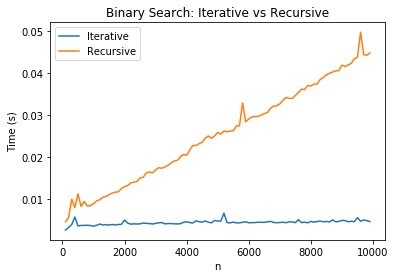

In [8]:
from timeit import Timer
from matplotlib import pyplot as plt
import random


iter_times = []
rec_times = []
for length in range(100, 10000, 100):
    test_list = list(range(length))
    
    iter_timer = Timer('binary_search_iter(test_list, random.randrange({}))'.format(length),
                      'from __main__ import binary_search_iter, test_list, random')
    rec_timer = Timer('binary_search_rec(test_list, random.randrange({}))'.format(length),
                      'from __main__ import binary_search_rec, test_list, random')
    iter_time = iter_timer.timeit(number=1000)
    rec_time = rec_timer.timeit(number=1000)
    iter_times.append(iter_time)
    rec_times.append(rec_time)
    
plt.plot(range(100, 10000, 100), iter_times, label='Iterative')
plt.plot(range(100, 10000, 100), rec_times, label='Recursive')
plt.title('Binary Search: Iterative vs Recursive')
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.legend()
plt.show()

List slicing is $O(n)$ – hence the linear complexity for recursion?

In [4]:
def binary_search_rec2(start, end, lst, value):
    '''Input list must be sorted!
    Implemented recursively without list slicing.
    '''
    if len(lst) == 0:
        return None
    
    if start > end:
        return None
    
    mid = (start + end) // 2
    
    if lst[mid] == value:
        return mid
    elif lst[mid] > value:
        return binary_search_rec2(start, mid-1, lst, value)
    else: # lst[mid] < value:
        return binary_search_rec2(mid+1, end, lst, value)

In [5]:
test_list = [0, 2, 4, 6, 8, 10]
value = 6

print(binary_search_rec(test_list, value))  # 3
print(binary_search_rec2(0, len(test_list)-1, test_list, value))  # 3

test_list = [0, 2, 4, 7, 8, 10]

print(binary_search_rec(test_list, value))  # None
print(binary_search_rec2(0, len(test_list)-1, test_list, value))  # None

3
3
None
None


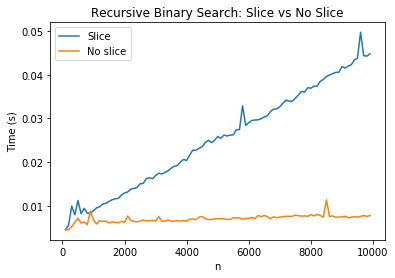

In [9]:
rec2_times = []
for length in range(100, 10000, 100):
    test_list = [random.randrange(length) for _ in range(length)]
    test_list.sort()
    
    rec2_timer = Timer('binary_search_rec2(0, len(test_list)-1, test_list, random.randrange({}))'.format(length),
                      'from __main__ import binary_search_rec2, test_list, random')
    rec2_time = rec2_timer.timeit(number=1000)
    rec2_times.append(rec2_time)
    
plt.plot(range(100, 10000, 100), rec_times, label='Slice')
plt.plot(range(100, 10000, 100), rec2_times, label='No slice')
plt.title('Recursive Binary Search: Slice vs No Slice')
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.legend()
plt.show()